# Evaluation of the models

**Comparison of all models**:

**ML:**
- Logistic Regression
- Random Forest
- Support Vector Machine
- Deep Neural Network (Multilayer Perceptron)
- Naive Bayes
- K-Nearest Neighbors

**LLMs:**
- GPT (OpenAI)
- Gemini
- Gemma
- Claude
- DeepSeek
- Grok
- Mistral

## 0 Imports

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import holoviews as hv
import plotly.graph_objects as go
from holoviews import opts
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, recall_score, matthews_corrcoef, accuracy_score
from sklearn.model_selection import train_test_split

In [28]:
data_change = pd.read_csv("../dat/dips/DIPS_Data_cleaned_change.csv", sep = ",", low_memory = False)

In [47]:
# y_pred_ML
y_pred_lr = pd.read_csv("y_pred_ML/y_pred_lr.csv", sep = ",")
y_pred_rf = pd.read_csv("y_pred_ML/y_pred_rf.csv", sep = ",")
y_pred_svc = pd.read_csv("y_pred_ML/y_pred_svc.csv", sep = ",")
y_pred_dnn = pd.read_csv("y_pred_ML/y_pred_dnn.csv", sep = ",")
y_pred_knn = pd.read_csv("y_pred_ML/y_pred_knn.csv", sep = ",")
y_pred_nb = pd.read_csv("y_pred_ML/y_pred_nb.csv", sep = ",")
y_pred_xgb = pd.read_csv("y_pred_ML/y_pred_xgb.csv", sep = ",")

In [ ]:
# y_pred_GPT
y_pred_GPT_simple_prompt = pd.read_csv("y_pred_LLMs/GPT/y_pred_GPT4_simple_prompt.csv", sep = ",")
y_pred_GPT_class_def_prompt = pd.read_csv("y_pred_LLMs/GPT/y_pred_GPT4_class_definitions_prompt.csv", sep = ",")
y_pred_GPT_profiled_simple_prompt = pd.read_csv("y_pred_LLMs/GPT/y_pred_GPT4_profiled_simple_prompt.csv", sep = ",")
y_pred_GPT_few_shot_prompt = pd.read_csv("y_pred_LLMs/GPT/y_pred_GPT4_few_shot_prompt.csv", sep = ",")
y_pred_GPT_vignette_prompt = pd.read_csv("y_pred_LLMs/GPT/y_pred_GPT4_vignette_prompt.csv", sep = ",")

In [ ]:
y_pred_Gemini_simple_prompt = pd.read_csv("y_pred_LLMs/Gemini/y_pred_gemini_simple_prompt.csv", sep = ",")

In [64]:
y_pred_Gemma_simple_prompt = pd.read_csv("y_pred_LLMs/Gemma/y_pred_gemma_simple_prompt.csv", sep = ",")

In [70]:
y_pred_Claude_simple_prompt = pd.read_csv("y_pred_LLMs/Claude/y_pred_Claude_simple_prompt.csv", sep = ",")

In [73]:
y_pred_Grok_simple_prompt = pd.read_csv("y_pred_LLMs/Grok/y_pred_Grok_simple_prompt.csv", sep = ",")
y_pred_Grok_class_def_prompt = pd.read_csv("y_pred_LLMs/Grok/y_pred_Grok_class_definitions_prompt.csv", sep = ",")

In [53]:
# time
time_lr = pd.read_csv("../exp/times_ML/time_lr.csv", sep = ",")
time_rf = pd.read_csv("../exp/times_ML/time_rf.csv", sep = ",")
time_svc = pd.read_csv("../exp/times_ML/time_svc.csv", sep = ",")
time_dnn = pd.read_csv("../exp/times_ML/time_dnn.csv", sep = ",")
time_knn = pd.read_csv("../exp/times_ML/time_knn.csv", sep = ",")
time_nb = pd.read_csv("../exp/times_ML/time_nb.csv", sep = ",")
time_xgb = pd.read_csv("../exp/times_ML/time_xgb.csv", sep = ",")

In [ ]:
time_GPT_simple_prompt = pd.read_csv("times_LLMs/GPT/time_GPT4_simple_prompt.csv", sep = ",")
time_GPT_class_def_prompt = pd.read_csv("times_LLMs/GPT/time_GPT4_class_definitions_prompt.csv", sep = ",")
time_GPT_profiled_simple_prompt = pd.read_csv("times_LLMs/GPT/time_GPT4_profiled_simple_prompt.csv", sep = ",")
time_GPT_few_shot_prompt = pd.read_csv("times_LLMs/GPT/time_GPT4_few_shot_prompt.csv", sep = ",")
time_GPT_vignette_prompt = pd.read_csv("times_LLMs/GPT/time_GPT4_vignette_prompt.csv", sep = ",")
# time_GPT_cot_prompt = pd.read_csv("times_LLMs/GPT/time_GPT4_cot_prompt.csv", sep = ",")

In [ ]:
time_Gemini_simple_prompt = pd.read_csv("times_LLMs/Gemini/time_gemini_simple_prompt.csv", sep = ",")

In [ ]:
time_Gemma_simple_prompt = pd.read_csv("times_LLMs/Gemma/time_gemma_simple_prompt.csv", sep = ",")

In [71]:
time_Claude_simple_prompt = pd.read_csv("times_LLMs/Claude/time_Claude_simple_prompt.csv", sep = ",")

In [ ]:
time_Grok_simple_prompt = pd.read_csv("times_LLMs/Grok/time_grok_simple_prompt.csv", sep = ",")
time_Grok_class_def_prompt = pd.read_csv("times_LLMs/Grok/time_grok_class_definitions_prompt.csv", sep = ",")

In [72]:
print("Total minutes needed:", time_Claude_simple_prompt.iloc[0, 0] // 60)
print("Seconds per prompt:", time_Claude_simple_prompt.iloc[0, 0] // 246)

Total minutes needed: 54.0
Seconds per prompt: 13.0


# 1 Metrics

In [38]:
# Predictors
X = data_change
X = X.drop(["hpi"], axis = 1)

# Target
y = data_change["hpi"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_train shape: ", X_train.shape, round(X_train.shape[0]/len(X), 2), "\n",
      "X_test shape: ", X_test.shape, round(X_test.shape[0]/len(X), 2),  "\n",
      "y_train shape: ", y_train.shape, round(y_train.shape[0]/len(y), 2), "\n",
      "y_test shape: ", y_test.shape, round(y_test.shape[0]/len(y), 2), "\n")

X_train shape:  (983, 22) 0.8 
 X_test shape:  (246, 22) 0.2 
 y_train shape:  (983,) 0.8 
 y_test shape:  (246,) 0.2 



In [39]:
print("Time in minutes:", round(time_GPT_simple_prompt["time"][0]/60, 2))
print("Time in seconds per prompt:", round(time_GPT_simple_prompt["time"][0]/len(X_test), 2))

Time in minutes: 4.38
Time in seconds per prompt: 1.07


In [40]:
y_test[:10]

548     0.0
1125    0.0
244     0.0
552     0.0
1163    0.0
1048    1.0
809     0.0
589     1.0
101     0.0
128     1.0
Name: hpi, dtype: float64

In [41]:
# calculate metrics for all models
def calculate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    macro_f1 = recall_score(y_test, y_pred, average = "macro")
    micro_f1 = recall_score(y_test, y_pred, average = "micro")
    mcc = matthews_corrcoef(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])

    # dictionary with all metrics
    metrics = {
        "accuracy": accuracy,
        "macro_f1": macro_f1,
        "micro_f1": micro_f1,
        "mcc": mcc,
        "precision": precision,
        "recall": recall,
        "sensitivity": sensitivity,
        "specificity": specificity
    }

    return metrics

In [65]:
# calculate metrics for all models
metrics_lr = calculate_metrics(y_test, y_pred_lr)
metrics_rf = calculate_metrics(y_test, y_pred_rf)
metrics_svc = calculate_metrics(y_test, y_pred_svc)
metrics_dnn = calculate_metrics(y_test, y_pred_dnn)
metrics_knn = calculate_metrics(y_test, y_pred_knn)
metrics_nb = calculate_metrics(y_test, y_pred_nb)
metrics_xgb = calculate_metrics(y_test, y_pred_xgb)

metrics_GPT_simple_prompt = calculate_metrics(y_test, y_pred_GPT_simple_prompt)
metrics_GPT_class_definitions_prompt = calculate_metrics(y_test, y_pred_GPT_class_definitions_prompt)
metrics_GPT_profiled_simple_prompt = calculate_metrics(y_test, y_pred_GPT_profiled_simple_prompt)
metrics_GPT_few_shot_prompt = calculate_metrics(y_test, y_pred_GPT_few_shot_prompt)
metrics_GPT_vignette_prompt = calculate_metrics(y_test, y_pred_GPT_vignette_prompt)

metrics_Grok_simple_prompt = calculate_metrics(y_test, y_pred_Grok_simple_prompt)

metrics_Gemini_simple_prompt = calculate_metrics(y_test, y_pred_Gemini_simple_prompt["y_pred"])

metrics_Gemma_simple_prompt = calculate_metrics(y_test, y_pred_Gemma_simple_prompt["y_pred"])

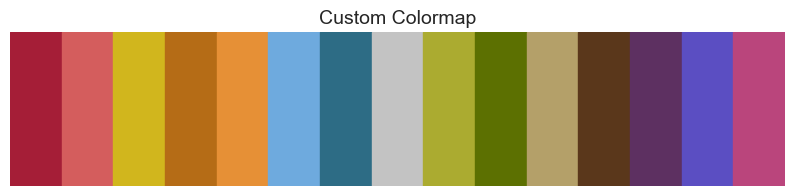

In [50]:
# define colors for the models

# base colors of QDS
base_colors = {
    "red": (165/255, 30/255, 55/255),
    "gray": (195/255, 195/255, 195/255),
    "lightgray": (203/255, 203/255, 203/255),
    "gold": (180/255, 160/255, 105/255),
}

hex_colors = [
    "#A51E37", "#D45D5D", "#D1B61D", "#B56C16", "#E69036",
    "#6EAADE", "#2D6C85", "#C3C3C3", "#ABAB30", "#5C7001",
    "#B4A069", "#5A371B", "#5D3061", "#5B4EC2", "#BA457C"
]

# Create a ListedColormap
custom_cmap = ListedColormap(hex_colors, name = "custom15")


# Visualize the colors
fig, ax = plt.subplots(figsize=(10, 2))
for i, color in enumerate(hex_colors):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
ax.set_xlim(0, len(hex_colors))
ax.set_ylim(0, 1)
ax.axis("off")
plt.title("Custom Colormap", fontsize=14)
plt.show()

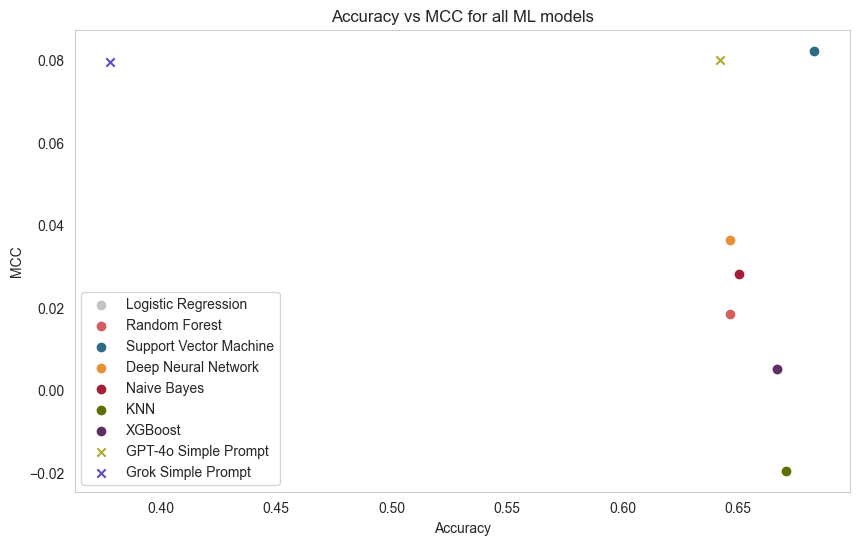

In [16]:
# plot accuracy (x-axis) and mcc (y-axis) for all models
plt.figure(figsize = (10, 6))
plt.scatter(metrics_lr["accuracy"], metrics_lr["mcc"], label = "Logistic Regression", color = hex_colors[7])
plt.scatter(metrics_rf["accuracy"], metrics_rf["mcc"], label = "Random Forest", color = hex_colors[1])
plt.scatter(metrics_svc["accuracy"], metrics_svc["mcc"], label = "Support Vector Machine", color = hex_colors[6])
plt.scatter(metrics_dnn["accuracy"], metrics_dnn["mcc"], label = "Deep Neural Network", color = hex_colors[4])
plt.scatter(metrics_nb["accuracy"], metrics_nb["mcc"], label = "Naive Bayes", color = hex_colors[0])
plt.scatter(metrics_knn["accuracy"], metrics_knn["mcc"], label = "KNN", color = hex_colors[9])
plt.scatter(metrics_xgb["accuracy"], metrics_xgb["mcc"], label = "XGBoost", color = hex_colors[12])

plt.scatter(metrics_GPT_simple_prompt["accuracy"], metrics_GPT_simple_prompt["mcc"], label = "GPT-4o Simple Prompt", color = hex_colors[8], marker = "x")
# plt.scatter(metrics_GPT_class_definitions_prompt["accuracy"], metrics_GPT_class_definitions_prompt["mcc"], label = "GPT-4o Class Definitions Prompt", color = hex_colors[13], marker = "x")
# plt.scatter(metrics_GPT_profiled_simple_prompt["accuracy"], metrics_GPT_profiled_simple_prompt["mcc"], label = "GPT-4o Profiled Simple Prompt", color = hex_colors[14], marker = "x")
# plt.scatter(metrics_GPT_few_shot_prompt["accuracy"], metrics_GPT_few_shot_prompt["mcc"], label = "GPT-4o Few Shot Prompt", color = hex_colors[11], marker = "x")
# plt.scatter(metrics_GPT_vignette_prompt["accuracy"], metrics_GPT_vignette_prompt["mcc"], label = "GPT-4o Vignette Prompt", color = hex_colors[5], marker = "x")

plt.scatter(metrics_Grok_simple_prompt["accuracy"], metrics_Grok_simple_prompt["mcc"], label = "Grok Simple Prompt", color = hex_colors[13], marker = "x")

plt.xlabel("Accuracy")
plt.ylabel("MCC")
plt.title("Accuracy vs MCC for all ML models")
plt.legend()
plt.grid()
# plt.show()

# save as png
# plt.savefig("../doc/figs/accuracy_mcc.png", dpi = 300, bbox_inches = "tight")

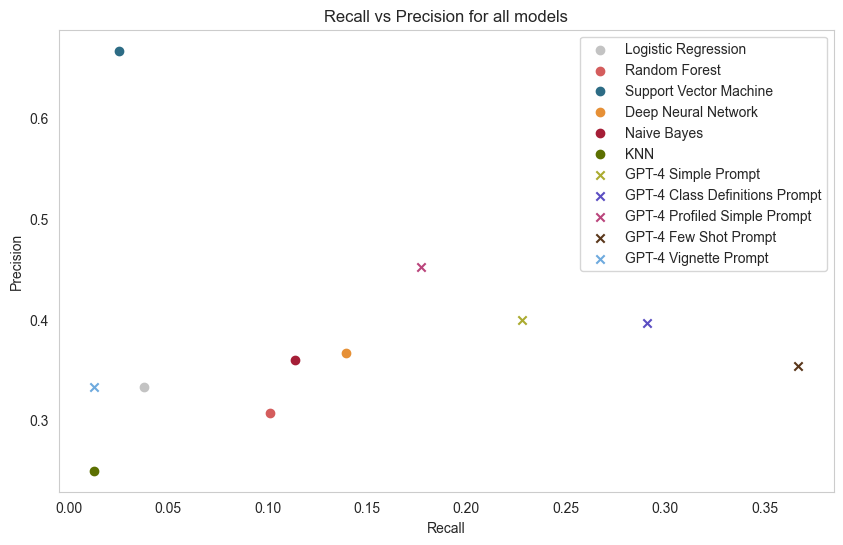

In [12]:
# plot recall vs precision for all models
plt.figure(figsize = (10, 6))
plt.scatter(metrics_lr["recall"], metrics_lr["precision"], label = "Logistic Regression", color = hex_colors[7])
plt.scatter(metrics_rf["recall"], metrics_rf["precision"], label = "Random Forest", color = hex_colors[1])
plt.scatter(metrics_svc["recall"], metrics_svc["precision"], label = "Support Vector Machine", color = hex_colors[6])
plt.scatter(metrics_dnn["recall"], metrics_dnn["precision"], label = "Deep Neural Network", color = hex_colors[4])
plt.scatter(metrics_nb["recall"], metrics_nb["precision"], label = "Naive Bayes", color = hex_colors[0])
plt.scatter(metrics_knn["recall"], metrics_knn["precision"], label = "KNN", color = hex_colors[9])

plt.scatter(metrics_GPT_simple_prompt["recall"], metrics_GPT_simple_prompt["precision"], label = "GPT-4 Simple Prompt", color = hex_colors[8], marker = "x")
plt.scatter(metrics_GPT_class_definitions_prompt["recall"], metrics_GPT_class_definitions_prompt["precision"], label = "GPT-4 Class Definitions Prompt", color = hex_colors[13], marker = "x")
plt.scatter(metrics_GPT_profiled_simple_prompt["recall"], metrics_GPT_profiled_simple_prompt["precision"], label = "GPT-4 Profiled Simple Prompt", color = hex_colors[14], marker = "x")
plt.scatter(metrics_GPT_few_shot_prompt["recall"], metrics_GPT_few_shot_prompt["precision"], label = "GPT-4 Few Shot Prompt", color = hex_colors[11], marker = "x")
plt.scatter(metrics_GPT_vignette_prompt["recall"], metrics_GPT_vignette_prompt["precision"], label = "GPT-4 Vignette Prompt", color = hex_colors[5], marker = "x")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall vs Precision for all models")
plt.legend()
plt.grid()
plt.show()

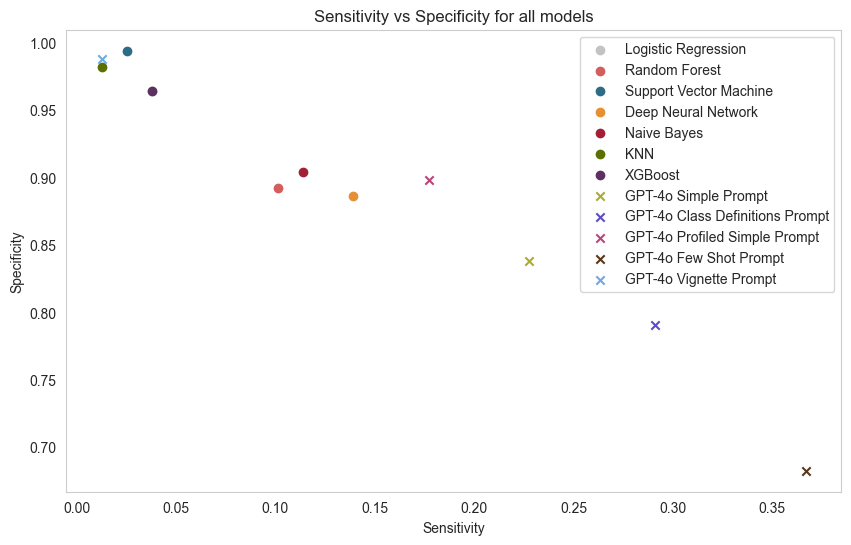

In [13]:
# sensitivity vs specificity
plt.figure(figsize = (10, 6))
plt.scatter(metrics_lr["sensitivity"], metrics_lr["specificity"], label = "Logistic Regression", color = hex_colors[7])
plt.scatter(metrics_rf["sensitivity"], metrics_rf["specificity"], label = "Random Forest", color = hex_colors[1])
plt.scatter(metrics_svc["sensitivity"], metrics_svc["specificity"], label = "Support Vector Machine", color = hex_colors[6])
plt.scatter(metrics_dnn["sensitivity"], metrics_dnn["specificity"], label = "Deep Neural Network", color = hex_colors[4])
plt.scatter(metrics_nb["sensitivity"], metrics_nb["specificity"], label = "Naive Bayes", color = hex_colors[0])
plt.scatter(metrics_knn["sensitivity"], metrics_knn["specificity"], label = "KNN", color = hex_colors[9])
plt.scatter(metrics_xgb["sensitivity"], metrics_xgb["specificity"], label = "XGBoost", color = hex_colors[12])

plt.scatter(metrics_GPT_simple_prompt["sensitivity"], metrics_GPT_simple_prompt["specificity"], label = "GPT-4o Simple Prompt", color = hex_colors[8], marker = "x")
plt.scatter(metrics_GPT_class_definitions_prompt["sensitivity"], metrics_GPT_class_definitions_prompt["specificity"], label = "GPT-4o Class Definitions Prompt", color = hex_colors[13], marker = "x")
plt.scatter(metrics_GPT_profiled_simple_prompt["sensitivity"], metrics_GPT_profiled_simple_prompt["specificity"], label = "GPT-4o Profiled Simple Prompt", color = hex_colors[14], marker = "x")
plt.scatter(metrics_GPT_few_shot_prompt["sensitivity"], metrics_GPT_few_shot_prompt["specificity"], label = "GPT-4o Few Shot Prompt", color = hex_colors[11], marker = "x")
plt.scatter(metrics_GPT_vignette_prompt["sensitivity"], metrics_GPT_vignette_prompt["specificity"], label = "GPT-4o Vignette Prompt", color = hex_colors[5], marker = "x")
plt.xlabel("Sensitivity")
plt.ylabel("Specificity")
plt.title("Sensitivity vs Specificity for all models")
plt.legend()
plt.grid()

# save as png
plt.savefig("../doc/figs/sensitivity_specificity.png", dpi = 300, bbox_inches = "tight")

**Sensitivity** = Wie viel Prozent der predicted positives sind wirklich positiv. Wie viele der tatsächlich kranken Personen hat das Model erkannt?

**Specificity** = Wie viel Prozent der predicted negatives sind wirklich negativ. Wie viele der tatsächlich gesunden Personen hat das Model richtig ausgeschlossen (negativ predicted)?

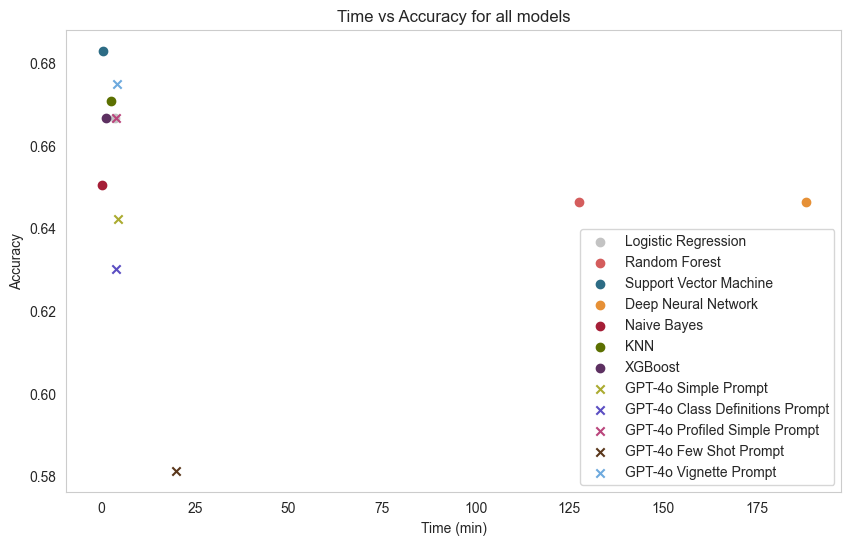

In [11]:
# plot time vs mcc for all models
plt.figure(figsize = (10, 6))
# plt.scatter(time_lr["time"], metrics_lr["accuracy"], label = "Logistic Regression", color = hex_colors[7])
# plt.scatter(time_rf["time"], metrics_rf["accuracy"], label = "Random Forest", color = hex_colors[1])
# plt.scatter(time_svc["time"], metrics_svc["accuracy"], label = "Support Vector Machine", color = hex_colors[6])
# plt.scatter(time_dnn["time"], metrics_dnn["accuracy"], label = "Deep Neural Network", color = hex_colors[4])
# plt.scatter(time_nb["time"], metrics_nb["accuracy"], label = "Naive Bayes", color = hex_colors[0])
# plt.scatter(time_knn["time"], metrics_knn["accuracy"], label = "KNN", color = hex_colors[9])
#
# plt.scatter(time_GPT_simple_prompt["time"], metrics_GPT_simple_prompt["accuracy"], label = "GPT-4 Simple Prompt", color = hex_colors[8], marker = "x")
# plt.scatter(time_GPT_class_definitions_prompt["time"], metrics_GPT_class_definitions_prompt["accuracy"], label = "GPT-4 Class Definitions Prompt", color = hex_colors[13], marker = "x")
# plt.scatter(time_GPT_profiled_simple_prompt["time"], metrics_GPT_profiled_simple_prompt["accuracy"], label = "GPT-4 Profiled Simple Prompt", color = hex_colors[14], marker = "x")
# plt.scatter(time_GPT_few_shot_prompt["time"], metrics_GPT_few_shot_prompt["accuracy"], label = "GPT-4 Few Shot Prompt", color = hex_colors[11], marker = "x")
# plt.scatter(time_GPT_vignette_prompt["time"], metrics_GPT_vignette_prompt["accuracy"], label = "GPT-4 Vignette Prompt", color = hex_colors[5], marker = "x")

# divide by 60 to get minutes x-axis
plt.scatter(time_lr["time"]/60, metrics_lr["accuracy"], label = "Logistic Regression", color = hex_colors[7])
plt.scatter(time_rf["time"]/60, metrics_rf["accuracy"], label = "Random Forest", color = hex_colors[1])
plt.scatter(time_svc["time"]/60, metrics_svc["accuracy"], label = "Support Vector Machine", color = hex_colors[6])
plt.scatter(time_dnn["time"]/60, metrics_dnn["accuracy"], label = "Deep Neural Network", color = hex_colors[4])
plt.scatter(time_nb["time"]/60, metrics_nb["accuracy"], label = "Naive Bayes", color = hex_colors[0])
plt.scatter(time_knn["time"]/60, metrics_knn["accuracy"], label = "KNN", color = hex_colors[9])
plt.scatter(time_xgb["time"]/60, metrics_xgb["accuracy"], label = "XGBoost", color = hex_colors[12])

plt.scatter(time_GPT_simple_prompt["time"]/60, metrics_GPT_simple_prompt["accuracy"], label = "GPT-4o Simple Prompt", color = hex_colors[8], marker = "x")
plt.scatter(time_GPT_class_definitions_prompt["time"]/60, metrics_GPT_class_definitions_prompt["accuracy"], label = "GPT-4o Class Definitions Prompt", color = hex_colors[13], marker = "x")
plt.scatter(time_GPT_profiled_simple_prompt["time"]/60, metrics_GPT_profiled_simple_prompt["accuracy"], label = "GPT-4o Profiled Simple Prompt", color = hex_colors[14], marker = "x")
plt.scatter(time_GPT_few_shot_prompt["time"]/60, metrics_GPT_few_shot_prompt["accuracy"], label = "GPT-4o Few Shot Prompt", color = hex_colors[11], marker = "x")
plt.scatter(time_GPT_vignette_prompt["time"]/60, metrics_GPT_vignette_prompt["accuracy"], label = "GPT-4o Vignette Prompt", color = hex_colors[5], marker = "x")

plt.xlabel("Time (min)")
plt.ylabel("Accuracy")
plt.title("Time vs Accuracy for all models")
plt.legend()
plt.grid()

# save as png
plt.savefig("../doc/figs/time_accuracy.png", dpi = 300, bbox_inches = "tight")

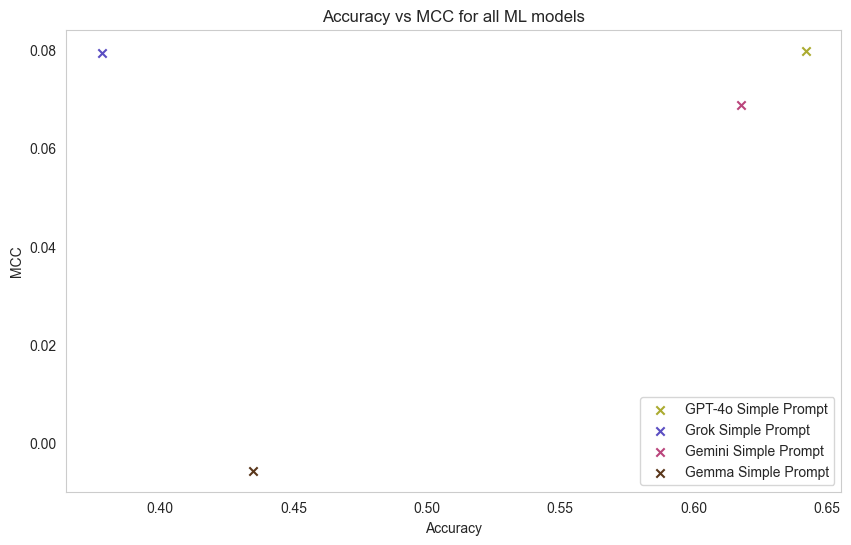

In [66]:
# plot all simple prompts for LLMs: MCC vs Accuracy
plt.figure(figsize = (10, 6))

plt.scatter(metrics_GPT_simple_prompt["accuracy"], metrics_GPT_simple_prompt["mcc"], label = "GPT-4o Simple Prompt", color = hex_colors[8], marker = "x")
plt.scatter(metrics_Grok_simple_prompt["accuracy"], metrics_Grok_simple_prompt["mcc"], label = "Grok Simple Prompt", color = hex_colors[13], marker = "x")
plt.scatter(metrics_Gemini_simple_prompt["accuracy"], metrics_Gemini_simple_prompt["mcc"], label = "Gemini Simple Prompt", color = hex_colors[14], marker = "x")
plt.scatter(metrics_Gemma_simple_prompt["accuracy"], metrics_Gemma_simple_prompt["mcc"], label = "Gemma Simple Prompt", color = hex_colors[11], marker = "x")

plt.xlabel("Accuracy")
plt.ylabel("MCC")
plt.title("Accuracy vs MCC for all ML models")
plt.legend()
plt.grid()

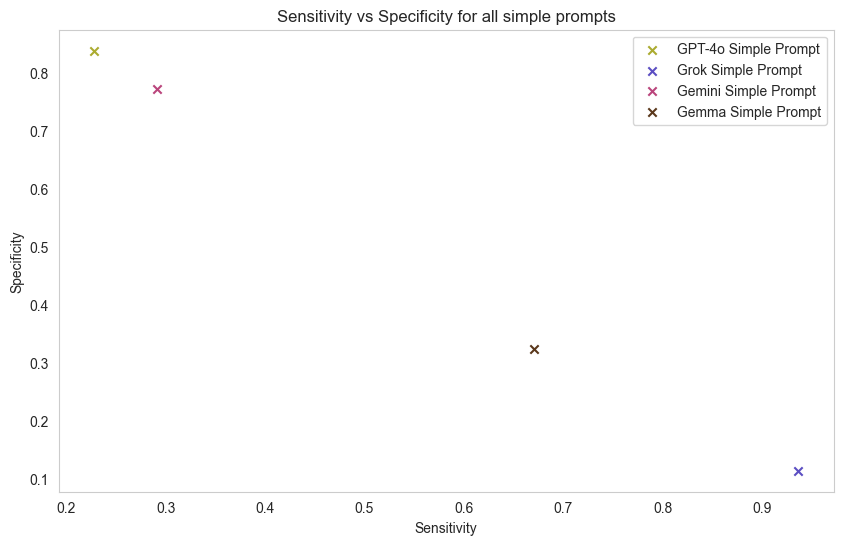

In [67]:
# plot sensitivity vs specificity for all simple prompts
plt.figure(figsize = (10, 6))

plt.scatter(metrics_GPT_simple_prompt["sensitivity"], metrics_GPT_simple_prompt["specificity"], label = "GPT-4o Simple Prompt", color = hex_colors[8], marker = "x")
plt.scatter(metrics_Grok_simple_prompt["sensitivity"], metrics_Grok_simple_prompt["specificity"], label = "Grok Simple Prompt", color = hex_colors[13], marker = "x")
plt.scatter(metrics_Gemini_simple_prompt["sensitivity"], metrics_Gemini_simple_prompt["specificity"], label = "Gemini Simple Prompt", color = hex_colors[14], marker = "x")
plt.scatter(metrics_Gemma_simple_prompt["sensitivity"], metrics_Gemma_simple_prompt["specificity"], label = "Gemma Simple Prompt", color = hex_colors[11], marker = "x")

plt.xlabel("Sensitivity")
plt.ylabel("Specificity")
plt.title("Sensitivity vs Specificity for all simple prompts")
plt.legend()
plt.grid()

# 2 Feature importance

# 3 Misclassifications

In [5]:
simple_prompt_reasons_df = pd.read_csv("reasons_miscl_LLMs/GPT/simple_prompt_reasons.csv", sep =",")
class_def_prompt_reasons_df = pd.read_csv("reasons_miscl_LLMs/GPT/class_def_prompt_reasons.csv", sep =",")
profiled_simple_prompt_reasons_df = pd.read_csv(
    "reasons_miscl_LLMs/GPT/profiled_simple_prompt_reasons.csv", sep =",")
few_shot_prompt_reasons_df = pd.read_csv("reasons_miscl_LLMs/GPT/few_shot_prompt_reasons.csv", sep =",")
vignette_prompt_reasons_df = pd.read_csv("reasons_miscl_LLMs/GPT/vignette_prompt_reasons.csv", sep =",")

In [6]:
simple_cases_df = pd.read_csv("reasons_miscl_LLMs/GPT/simple_cases_GPT_df.csv", sep =",")
class_def_cases_df = pd.read_csv("reasons_miscl_LLMs/GPT/class_def_cases_GPT_df.csv", sep =",")
profiled_cases_df = pd.read_csv("reasons_miscl_LLMs/GPT/profiled_cases_GPT_df.csv", sep =",")
few_shot_cases_df = pd.read_csv("reasons_miscl_LLMs/GPT/few_shot_cases_GPT_df.csv", sep =",")
vignette_cases_df = pd.read_csv("reasons_miscl_LLMs/GPT/vignette_cases_GPT_df.csv", sep =",")

In [10]:
simple_cases_df["total"][0]

np.int64(246)

In [13]:
simple_cases_df = simple_cases_df.to_dict()
simple_prompt_reasons_df = simple_prompt_reasons_df.to_dict()

{'Unnamed: 0': {0: 0},
 'total': {0: 246},
 'correct': {0: 160},
 'missclassified': {0: 86}}

In [16]:
# Sankey components
labels = [
    "Total",              # 0
    "Correct",            # 1
    "Misclassified",      # 2
    *simple_prompt_reasons_df.keys()       # 3+
]

# Links: from -> to -> value
sources = [0, 0]  # Total -> Correct, Misclassified
targets = [1, 2]
values = [simple_cases_df["correct"], simple_cases_df["missclassified"]]

# Add each misclassification reason
for i, (reason, count) in enumerate(simple_prompt_reasons_df.items()):
    sources.append(2)                # From Misclassified
    targets.append(3 + i)            # To each reason node
    values.append(count)

In [17]:
# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color="black", width=0.5),
        label = labels
    ),
    link=dict(
        source = sources,
        target = targets,
        value = values
    )
)])

fig.update_layout(title_text = "Sankey Diagram of Prediction Outcomes and Misclassification Reasons", font_size=12)
fig.show()

In [19]:
# 3. Build Sankey data as list of dicts (or DataFrame)
sankey_data = [
    {'source': 'Total', 'target': 'Correct', 'value': simple_cases_df["correct"]},
    {'source': 'Total', 'target': 'Misclassified', 'value': simple_cases_df["missclassified"]}
]

# Add misclassification reasons
for reason, count in simple_prompt_reasons_df.items():
    sankey_data.append({'source': 'Misclassified', 'target': reason, 'value': count})

# 4. Convert to DataFrame
sankey_df = pd.DataFrame(sankey_data)

# 5. Plot with HoloViews
sankey = hv.Sankey(sankey_df)

sankey.opts(
    opts.Sankey(
        width=800,
        height=500,
        node_width=20,
        node_padding=10,
        edge_color='source',
        label_position='left',
        cmap='Category20'
    )
)

TypeError: unsupported operand type(s) for +: 'dict' and 'dict'

In [21]:
sankey_df

,source,target,value
0,Total,Correct,{0: 160}
1,Total,Misclassified,{0: 86}
2,Misclassified,Unnamed: 0,0 Lack of context 1 ...
3,Misclassified,count,0 85 1 48 2 6 3 18 4 5 5 ...


In [24]:
import plotly.graph_objects as go

# 1. Total number of y_pred_ML
total_cases = simple_cases_df["total"]
num_misclassified = simple_cases_df["missclassified"]
num_correct = simple_cases_df["correct"]

# 3. Misclassification reasons from your vignette_prompt_reasons_df (hardcoded for this example)
reasons = {
    "Lack of context": 69,
    "Prediction with Abstention": 17,
    "Lack of examples": 20,
    "Knowledge conflicts": 18,
    "Lack of counterfactual demonstrations": 5,
    "Lack of feedback": 4
}

# Sankey components
labels = [
    "Total",              # 0
    "Correct",            # 1
    "Misclassified",      # 2
    *reasons.keys()       # 3+
]

# Links: from -> to -> value
sources = [0, 0]  # Total -> Correct, Misclassified
targets = [1, 2]
values = [num_correct, num_misclassified]

# Add each misclassification reason
for i, (reason, count) in enumerate(reasons.items()):
    sources.append(2)                # From Misclassified
    targets.append(3 + i)            # To each reason node
    values.append(count)

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

fig.update_layout(title_text="Sankey Diagram of Prediction Outcomes and Misclassification Reasons", font_size=12)
fig.show()
